# Data Summarization:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the .txt file with '|' as the delimiter
df = pd.read_csv('../assets/data/MachineLearningRating_v3.txt', delimiter='|')

# Select numerical features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numeric_columns)
df_cleaned = df[numeric_columns].dropna() 

#  Calculate descriptive statistics
stats = pd.DataFrame({
    'Mean': df[numeric_columns].mean(),
    'Median': df[numeric_columns].median(),
    'Range': df[numeric_columns].max() - df[numeric_columns].min(),
    'Variance': df[numeric_columns].var(),
    'Standard Deviation': df[numeric_columns].std(),
    'IQR': df[numeric_columns].quantile(0.75) - df[numeric_columns].quantile(0.25)
})

# Save statistics to a CSV file
stats.to_csv('../assets/data/variability_statistics.csv', index=True)
print("Statistics saved to 'variability_statistics.csv'")



/tmp/ipykernel_38614/808314976.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../assets/data/MachineLearningRating_v3.txt', delimiter='|')


Numerical columns: Index(['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode',
       'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts',
       'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet',
       'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium',
       'TotalClaims'],
      dtype='object')
Statistics saved to 'variability_statistics.csv'


## Data Sturcture 

In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv('../assets/data/MachineLearningRating_v3.txt', delimiter='|')

# Review the data types
print(df.dtypes)

# Additional Information
print(df.info())

# Check unique values for categorical data detection
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()[:10]}")  # Show up to 10 unique values


/tmp/ipykernel_5787/548411859.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../assets/data/MachineLearningRating_v3.txt', delimiter='|')


UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

# missing value analysis

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


# Univariate Analysis

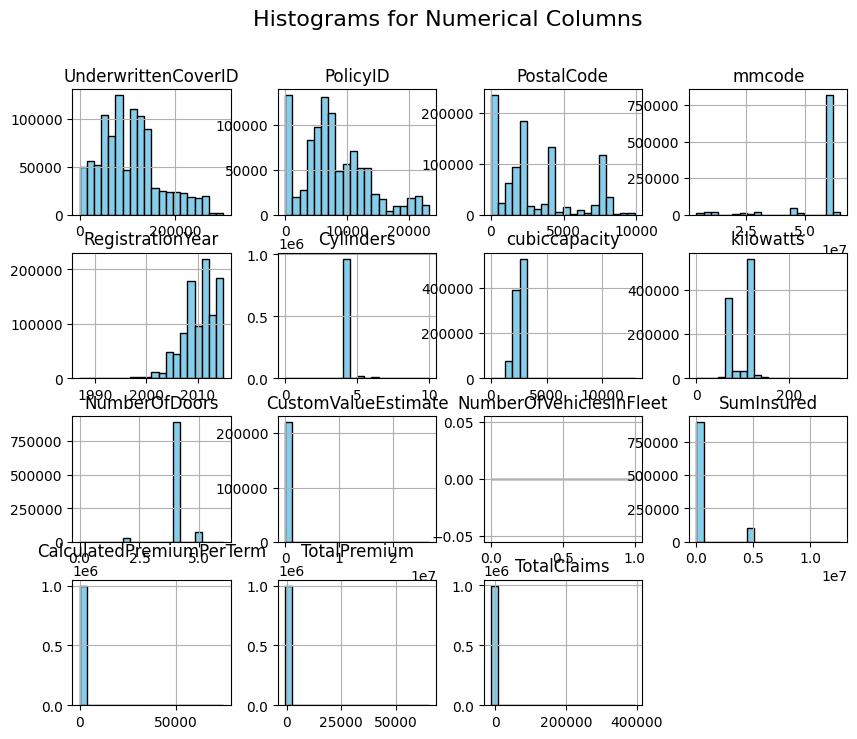

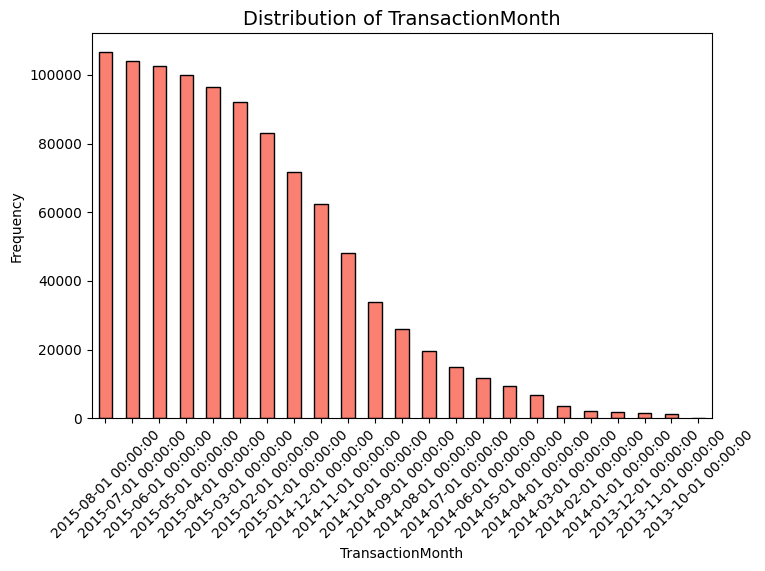

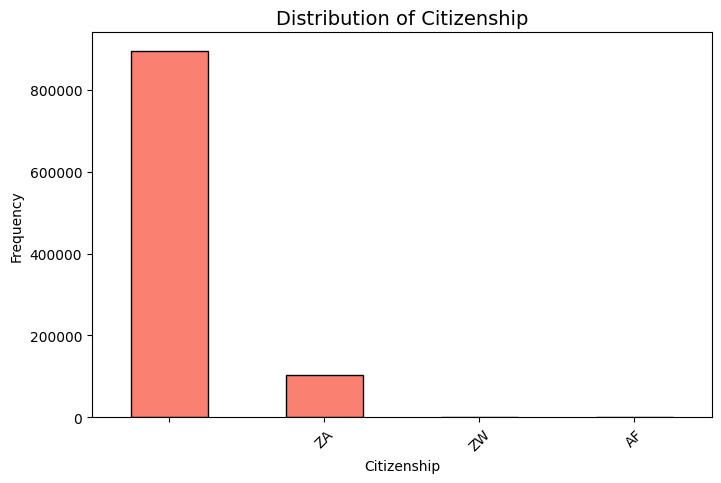

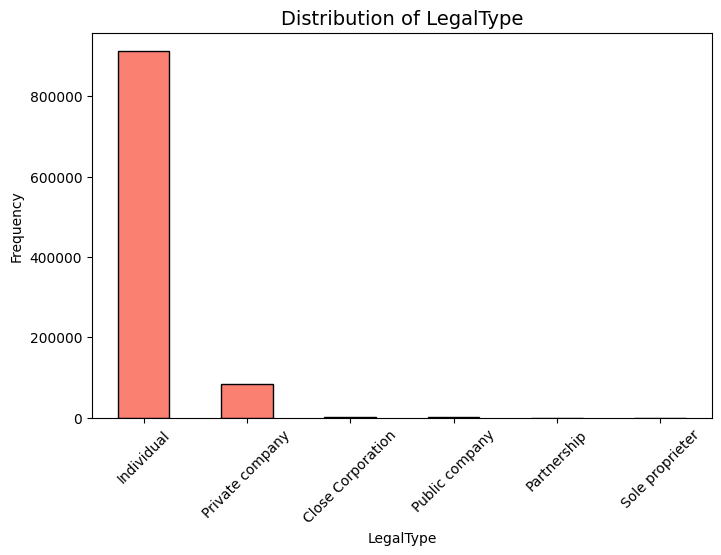

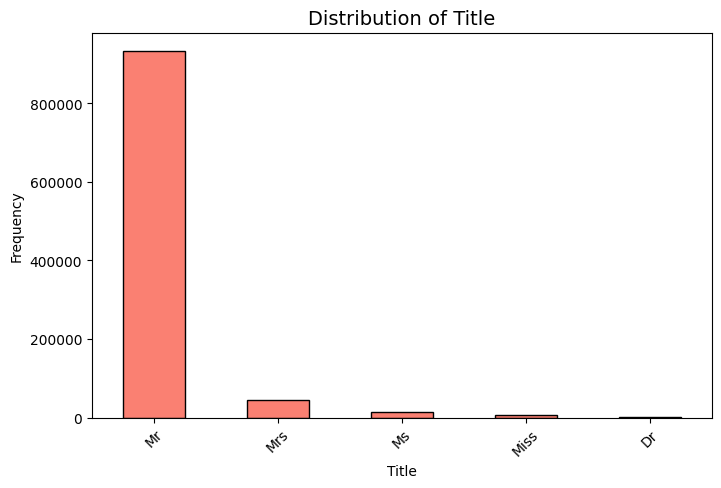

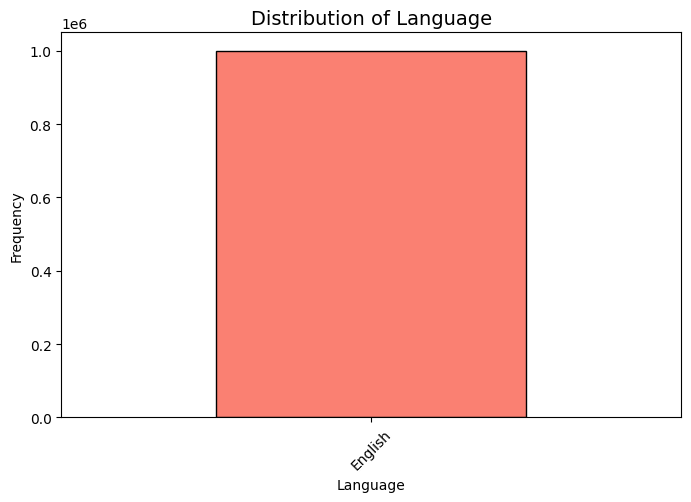

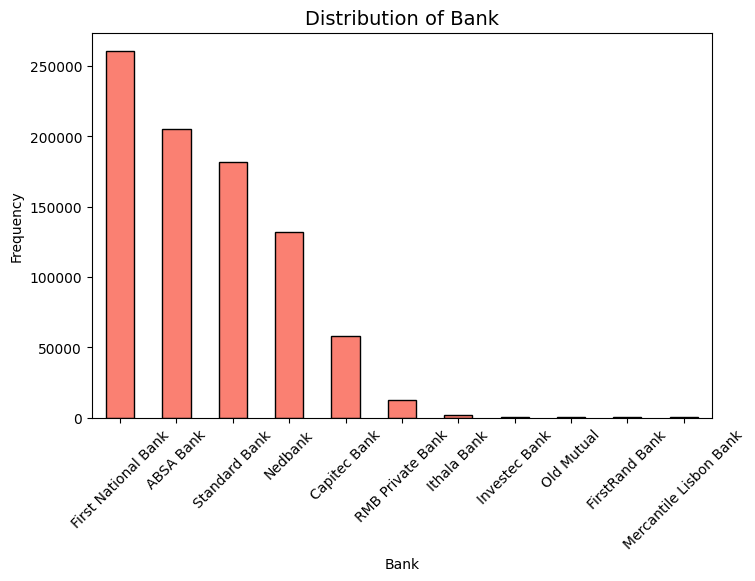

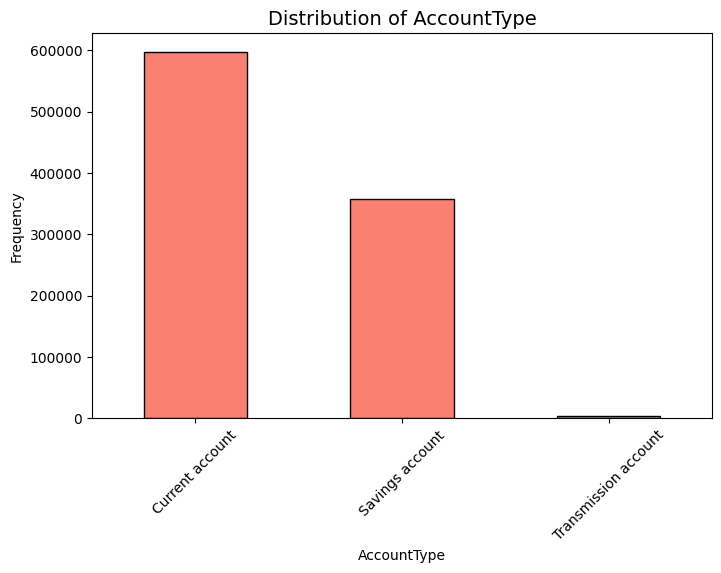

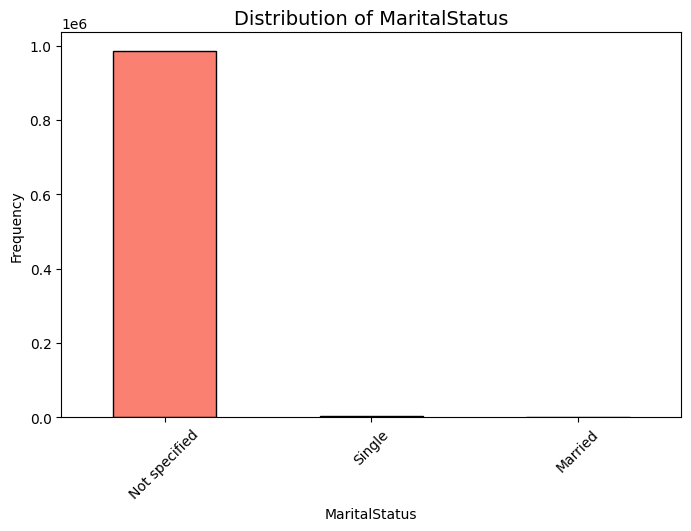

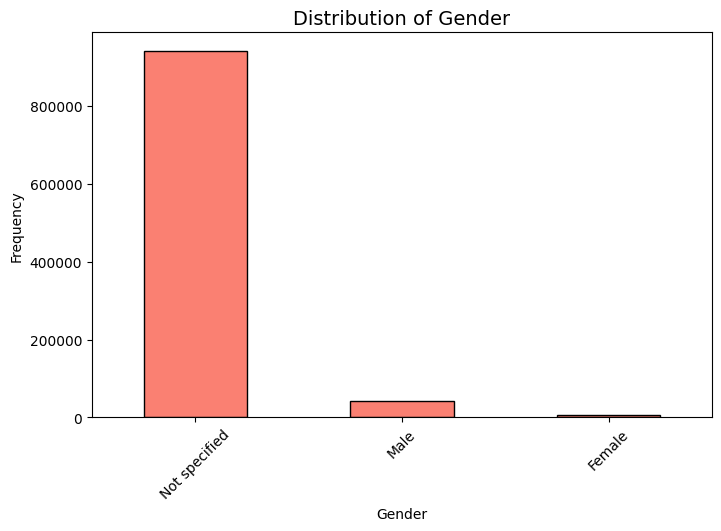

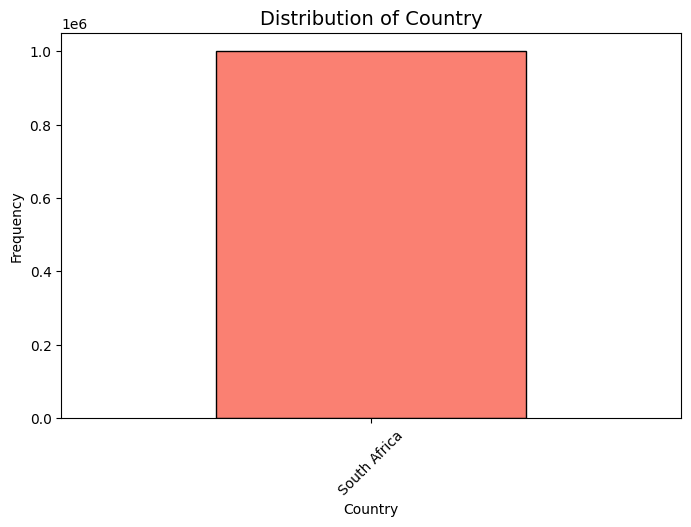

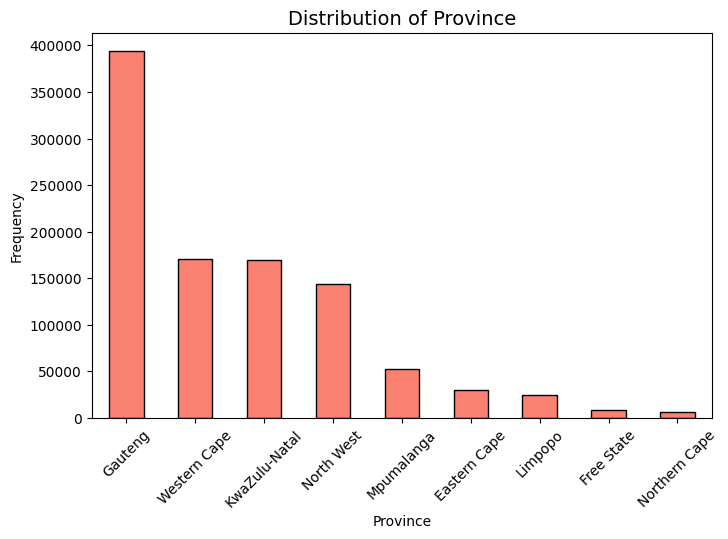

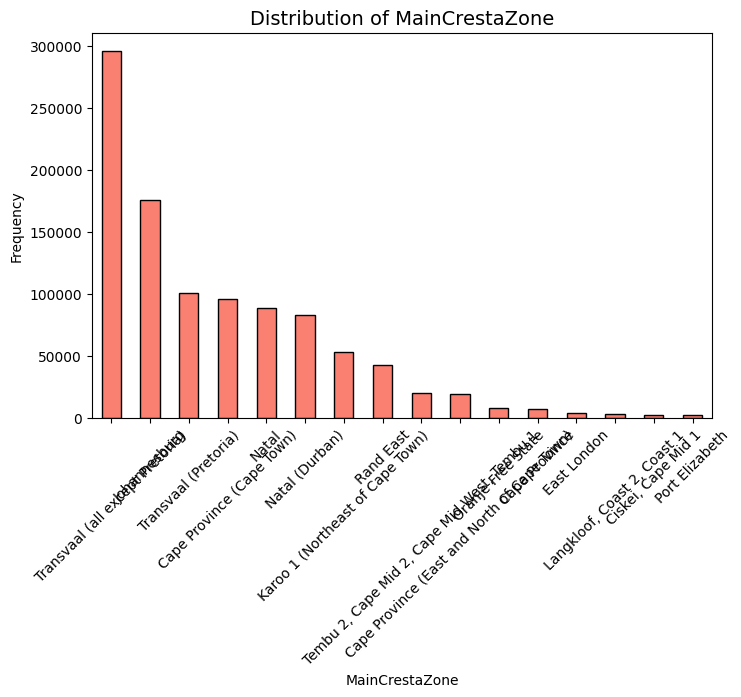

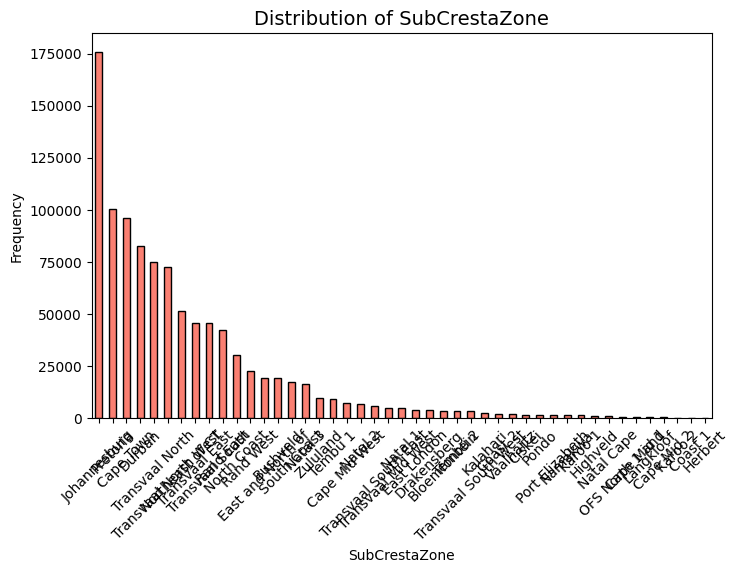

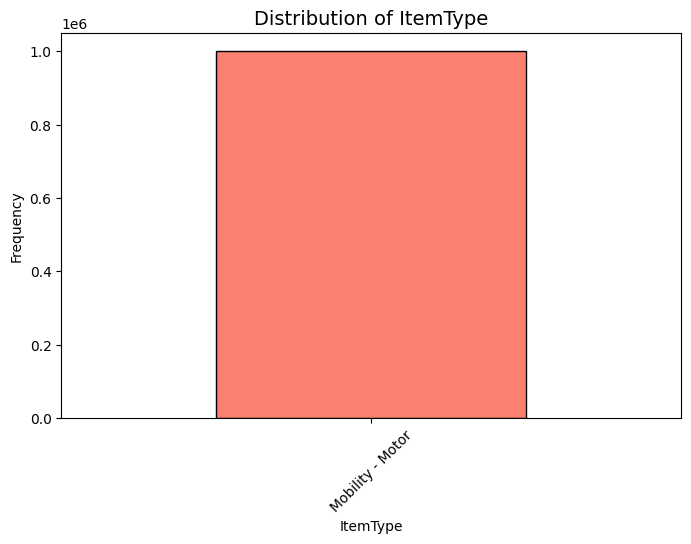

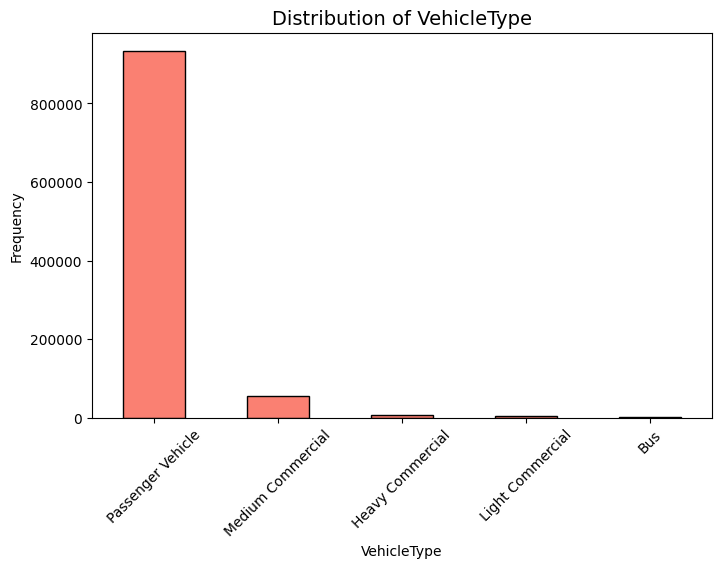

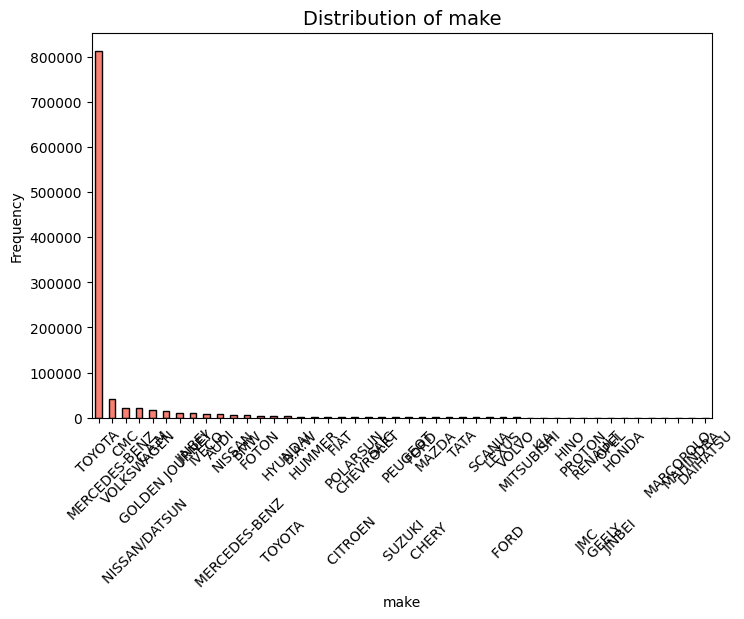

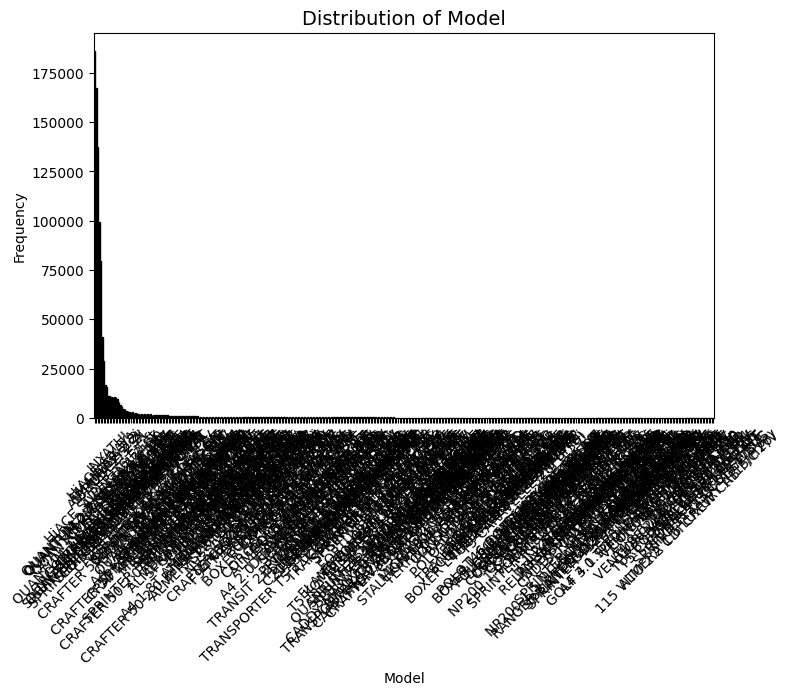

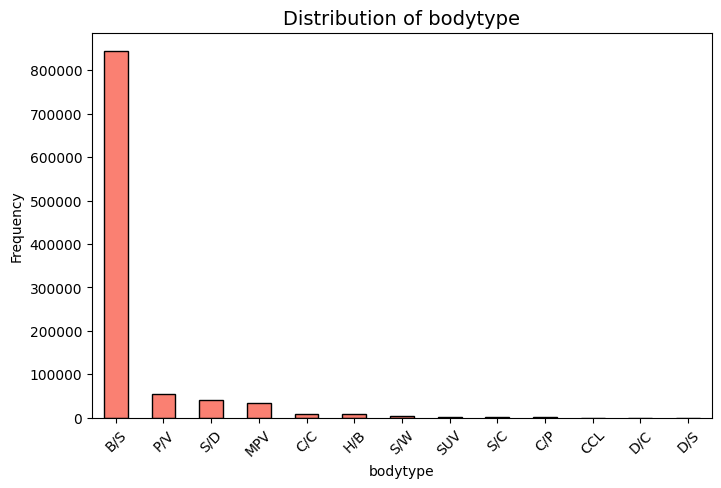

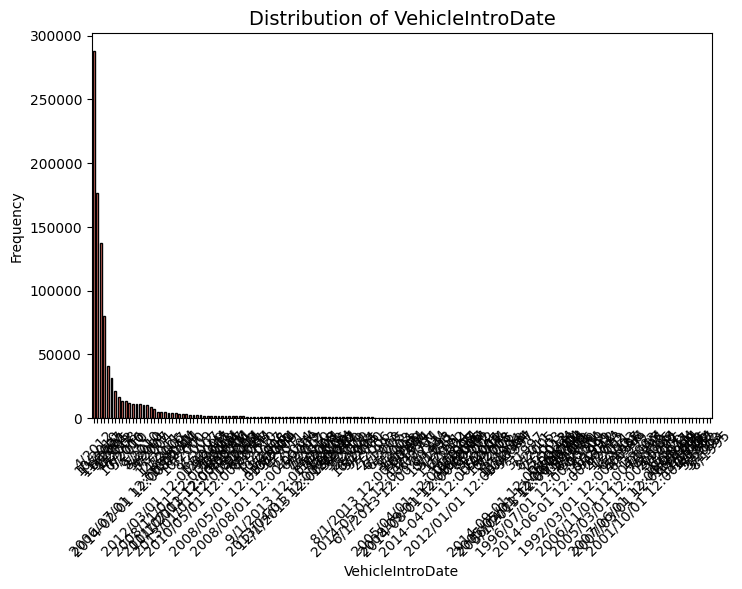

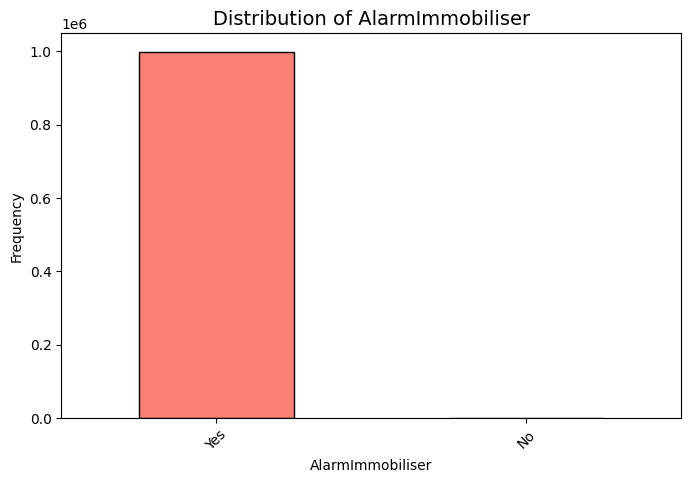

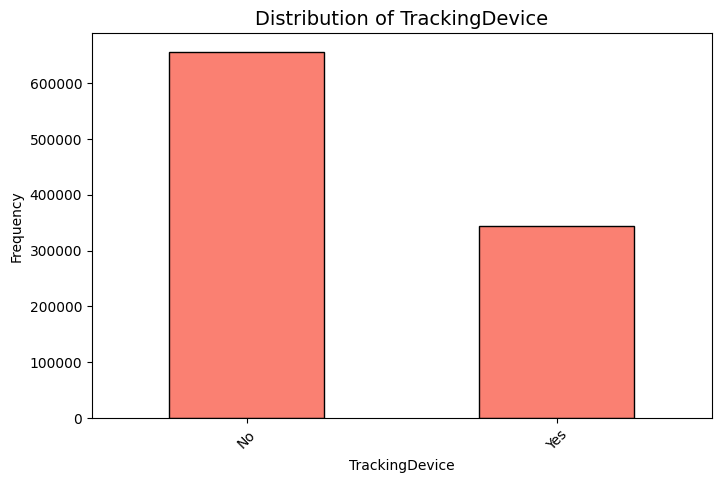

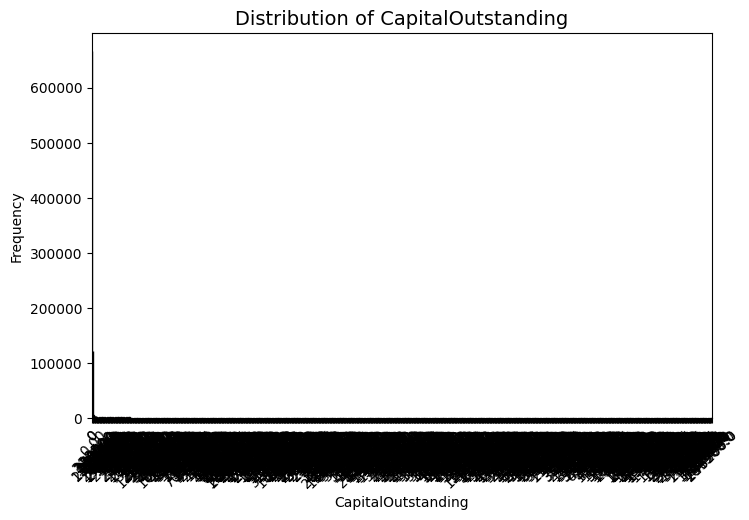

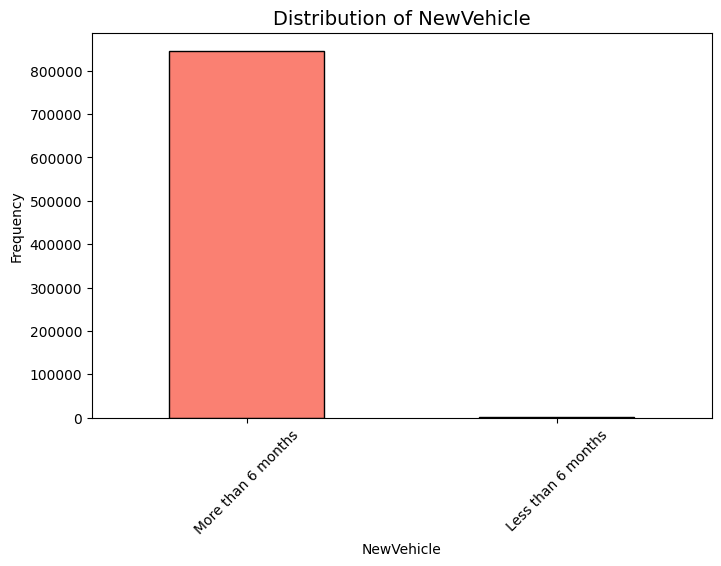

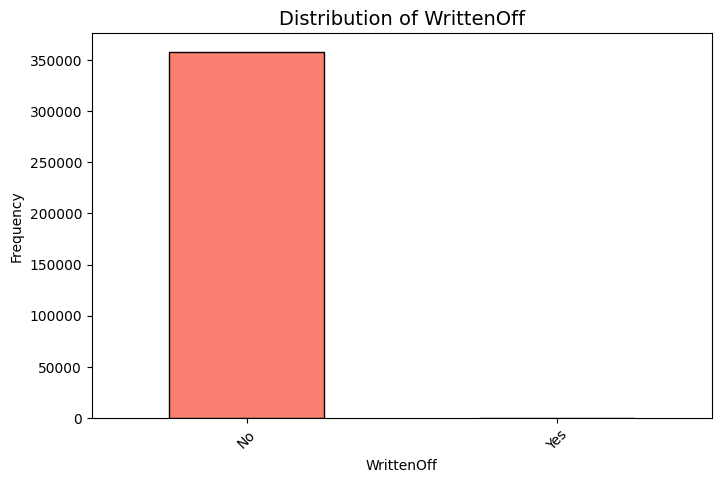

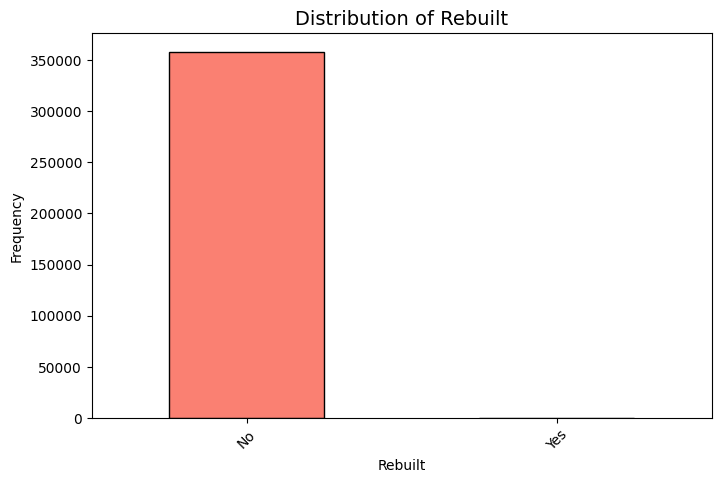

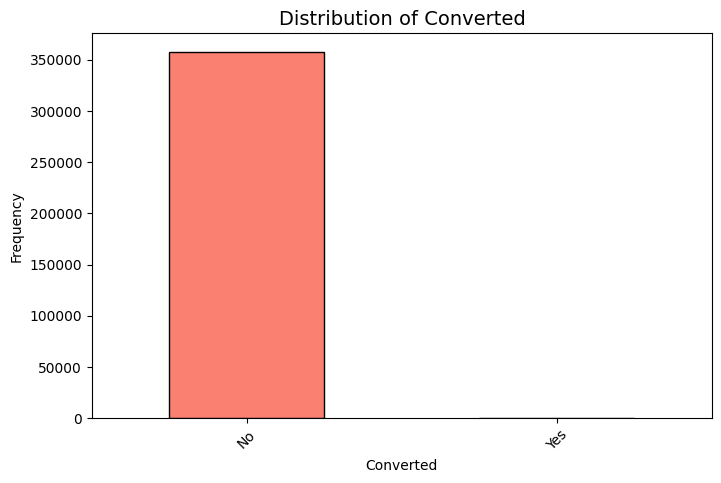

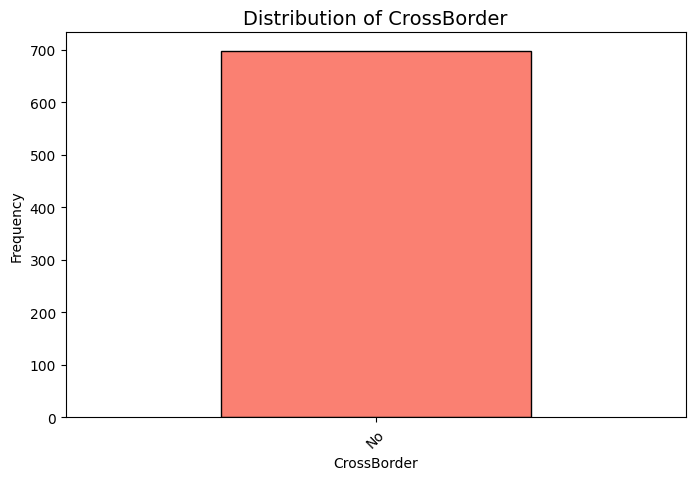

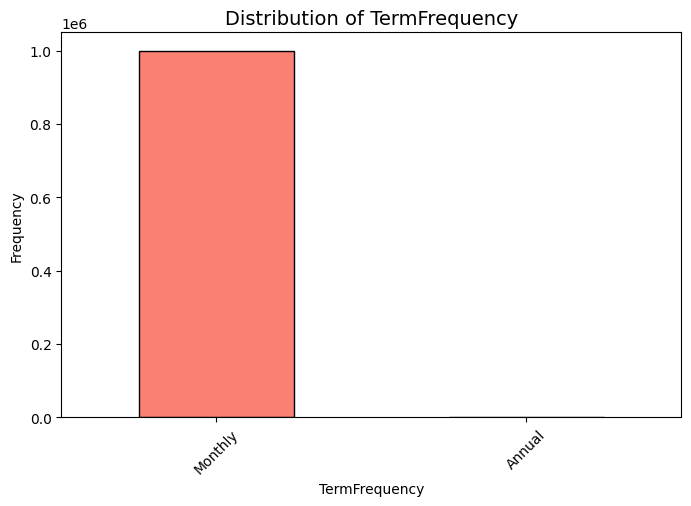

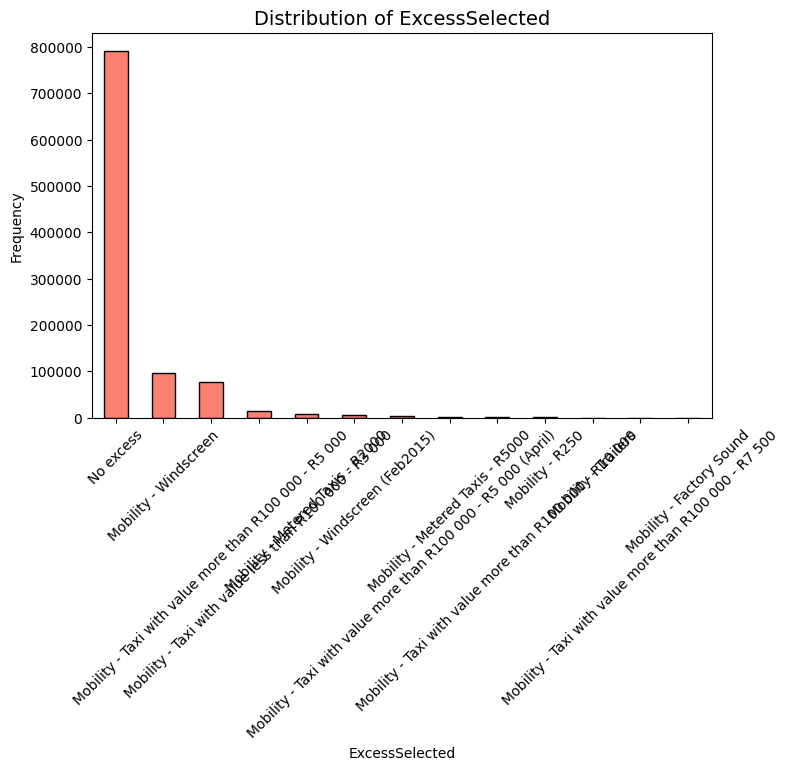

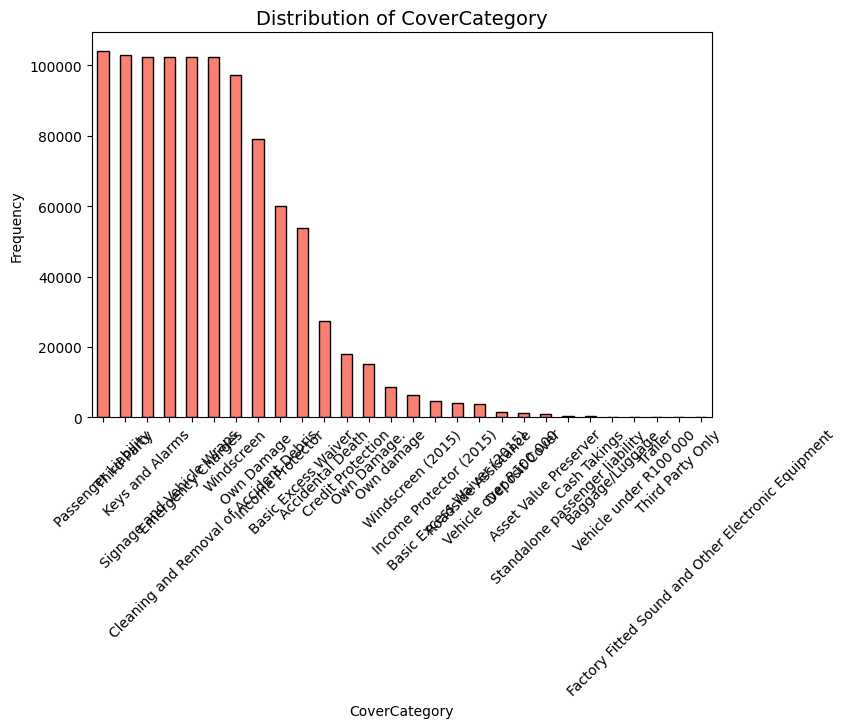

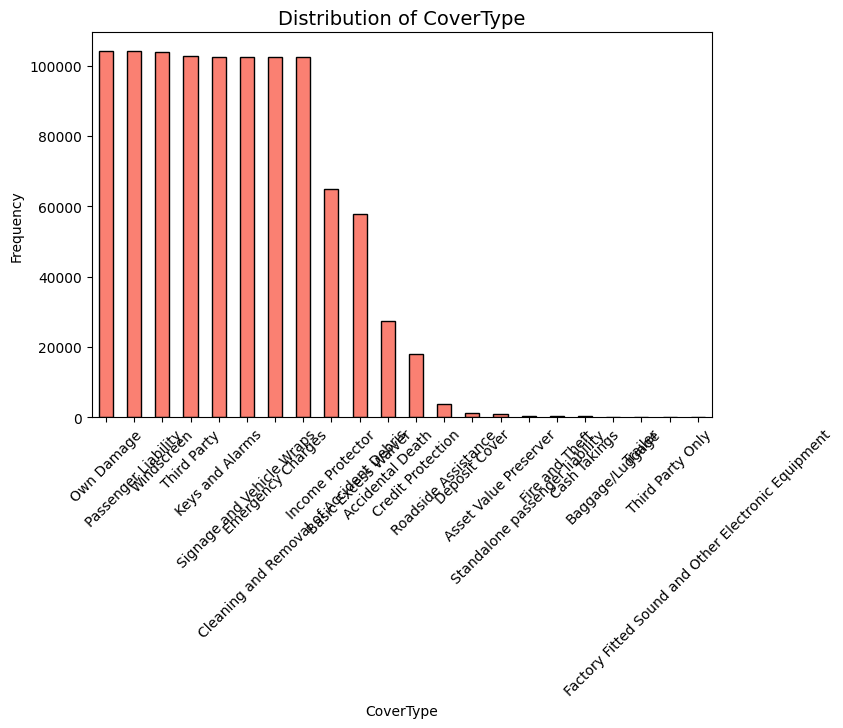

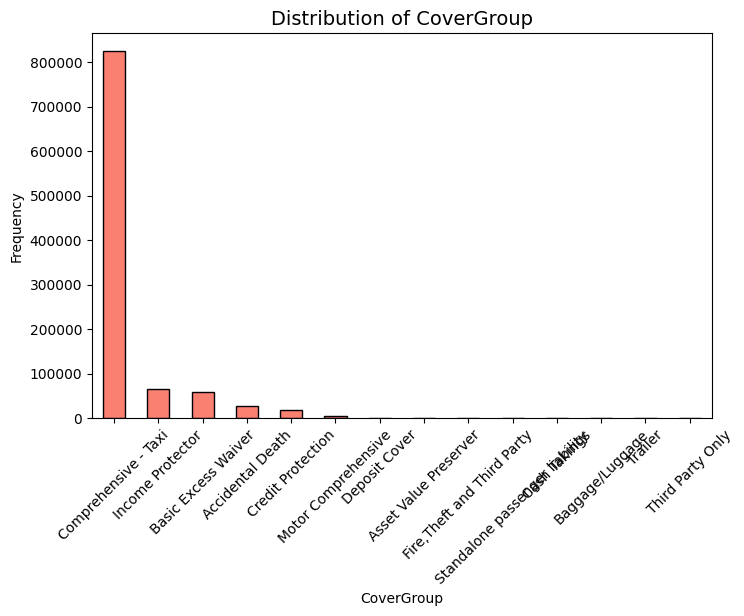

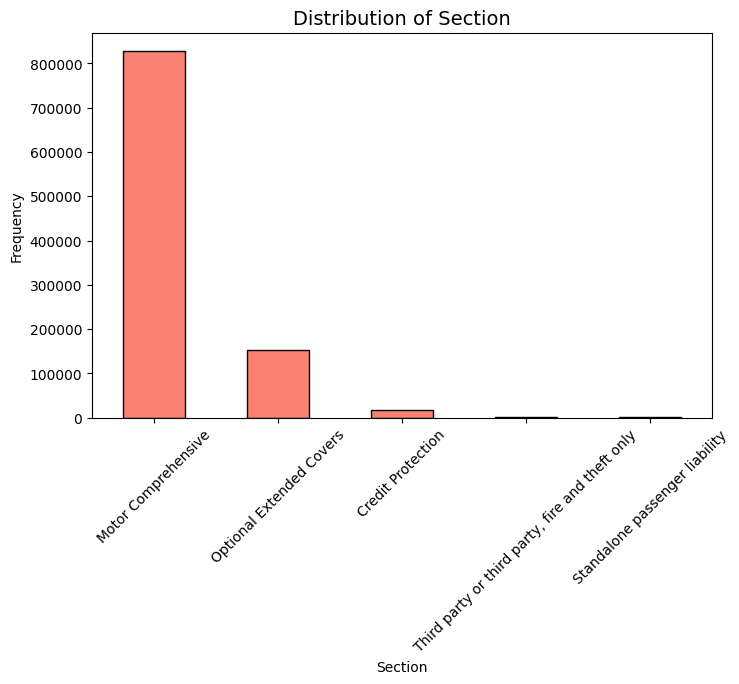

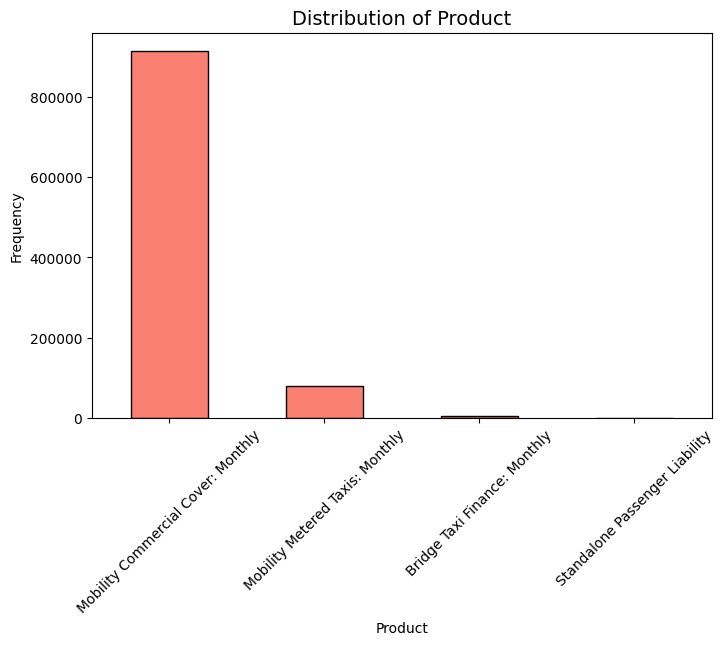

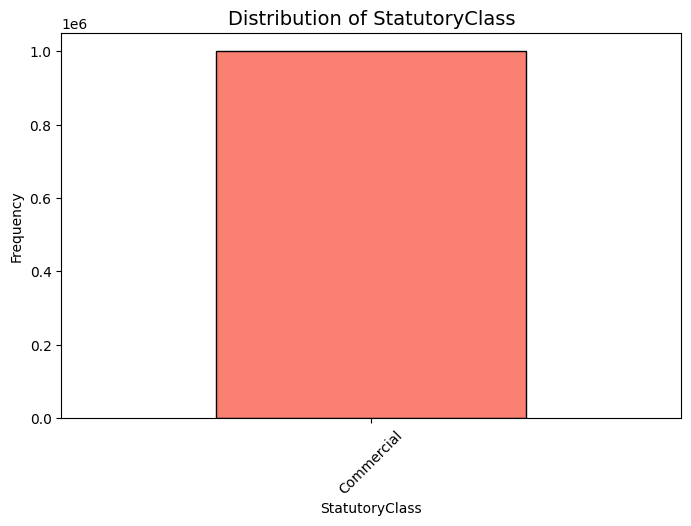

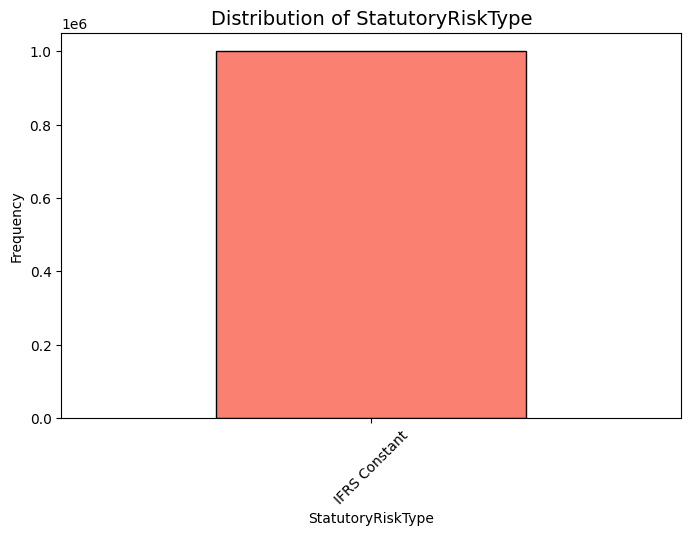

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms for Numerical Columns', fontsize=16)
plt.show()

# Plot bar charts for categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()


# Bivariate  Analysis

Overall Correlation between TotalPremium and TotalClaims:
              TotalPremium  TotalClaims
TotalPremium      1.000000     0.121588
TotalClaims       0.121588     1.000000


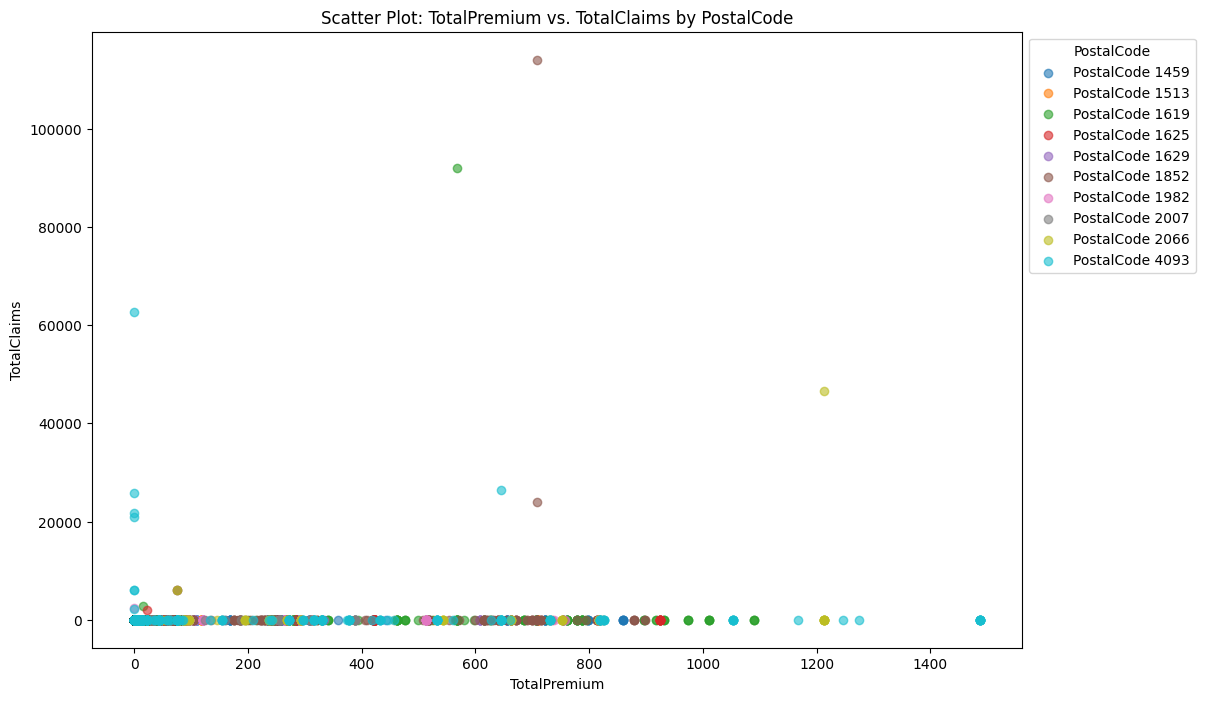


Correlation between TotalPremium and TotalClaims by PostalCode:
PostalCode              
1           TotalPremium    0.088382
1000        TotalPremium         NaN
1003        TotalPremium         NaN
101         TotalPremium         NaN
1020        TotalPremium    0.129913
                              ...   
984         TotalPremium         NaN
9868        TotalPremium         NaN
9869        TotalPremium   -0.005155
9870        TotalPremium         NaN
993         TotalPremium    0.000557
Name: TotalClaims, Length: 888, dtype: float64


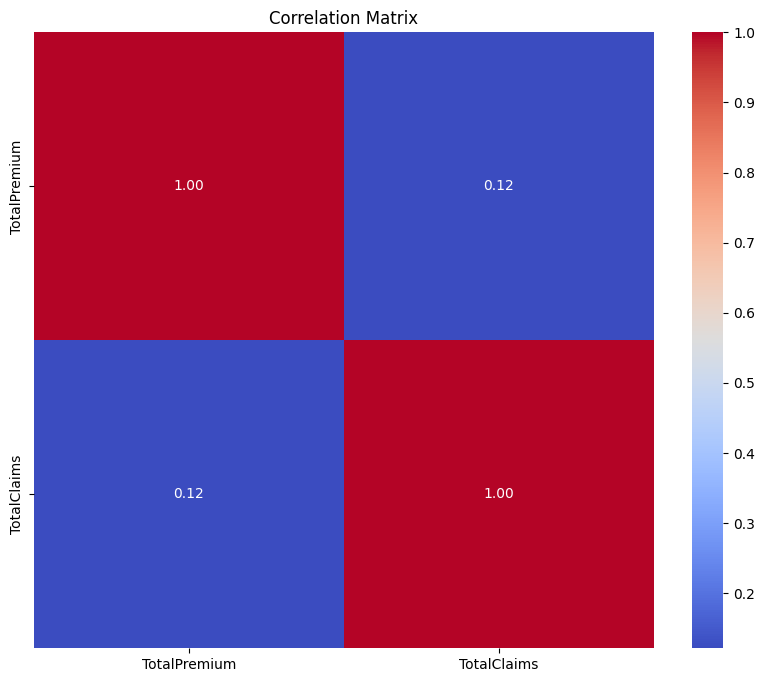

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the required columns exist
required_columns = ['TotalPremium', 'TotalClaims', 'PostalCode']
df.rename(columns={'ZipCode': 'PostalCode'}, inplace=True)

if all(col in df.columns for col in required_columns):
    # Convert PostalCode to string if not already
    df['PostalCode'] = df['PostalCode'].astype(str)
    
    # Convert TotalPremium and TotalClaims to numeric
    df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
    df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')
    
    # Drop rows with NaN in the relevant columns
    df = df.dropna(subset=['TotalPremium', 'TotalClaims'])
    
    # Overall correlation
    correlation = df[['TotalPremium', 'TotalClaims']].corr()
    print("Overall Correlation between TotalPremium and TotalClaims:")
    print(correlation)

    # Scatter plot grouped by PostalCode
    unique_postalcodes = df['PostalCode'].unique()
    plt.figure(figsize=(12, 8))
    for postalcode in unique_postalcodes[:10]:  # Limit to 10 PostalCodes for visualization
        subset = df[df['PostalCode'] == postalcode]
        plt.scatter(subset['TotalPremium'], subset['TotalClaims'], label=f'PostalCode {postalcode}', alpha=0.6)

    plt.title('Scatter Plot: TotalPremium vs. TotalClaims by PostalCode')
    plt.xlabel('TotalPremium')
    plt.ylabel('TotalClaims')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='PostalCode')
    plt.show()

    # Correlation by PostalCode
    grouped = df.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].corr().iloc[0::2, -1]
    print("\nCorrelation between TotalPremium and TotalClaims by PostalCode:")
    print(grouped)

    # Full correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[['TotalPremium', 'TotalClaims']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

else:
    print(f"One or more required columns are missing: {required_columns}")

# Change PostalCode back to ZipCode
df.rename(columns={'PostalCode': 'ZipCode'}, inplace=True)


In [ ]:
# Replace 'Province' or 'Country' with the actual column name in your dataset
geography_col = 'Province'  

# Check if the geography column exists
if geography_col in df.columns:

    # Group by Province/Country and aggregate metrics
    aggregated_data = df.groupby(geography_col).agg({
        'TotalPremium': ['mean', 'median', 'sum'],
        'InsuranceCoverType': lambda x: x.value_counts().idxmax(),  
        'AutoMake': lambda x: x.value_counts().idxmax()  
    }).reset_index()
    
    # Rename columns for better readability
    aggregated_data.columns = [geography_col, 'AvgPremium', 'MedianPremium', 'TotalPremium', 
                               'MostCommonCoverType', 'MostPopularAutoMake']
    print(f"Aggregated Data by {geography_col}:")
    print(aggregated_data)

    # Visualization: Average Premium by Province/Country
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=geography_col,
        y='AvgPremium',
        data=aggregated_data,
        palette='Blues_d'
    )
    plt.title(f'Average Premium by {geography_col}')
    plt.ylabel('Average Premium')
    plt.xlabel(geography_col)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

    # Visualization: Most Common Cover Type Distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(
        x=geography_col,
        hue='InsuranceCoverType',
        data=df,
        palette='Set3'
    )
    plt.title(f'Distribution of Insurance Cover Type by {geography_col}')
    plt.ylabel('Count')
    plt.xlabel(geography_col)
    plt.xticks(rotation=45)
    plt.legend(title='Cover Type')
    plt.show()

    # Visualization: Popular Auto Makes by Province/Country
    plt.figure(figsize=(12, 6))
    sns.countplot(
        y='AutoMake',
        hue=geography_col,
        data=df,
        palette='coolwarm',
        order=df['AutoMake'].value_counts().index
    )
    plt.title(f'Popular Auto Makes by {geography_col}')
    plt.xlabel('Count')
    plt.ylabel('Auto Make')
    plt.legend(title=geography_col)
    plt.show()

else:
    print(f"The column '{geography_col}' does not exist in the dataset.")


KeyError: "Column(s) ['AutoMake', 'InsuranceCoverType'] do not exist"

# Outlier Detection

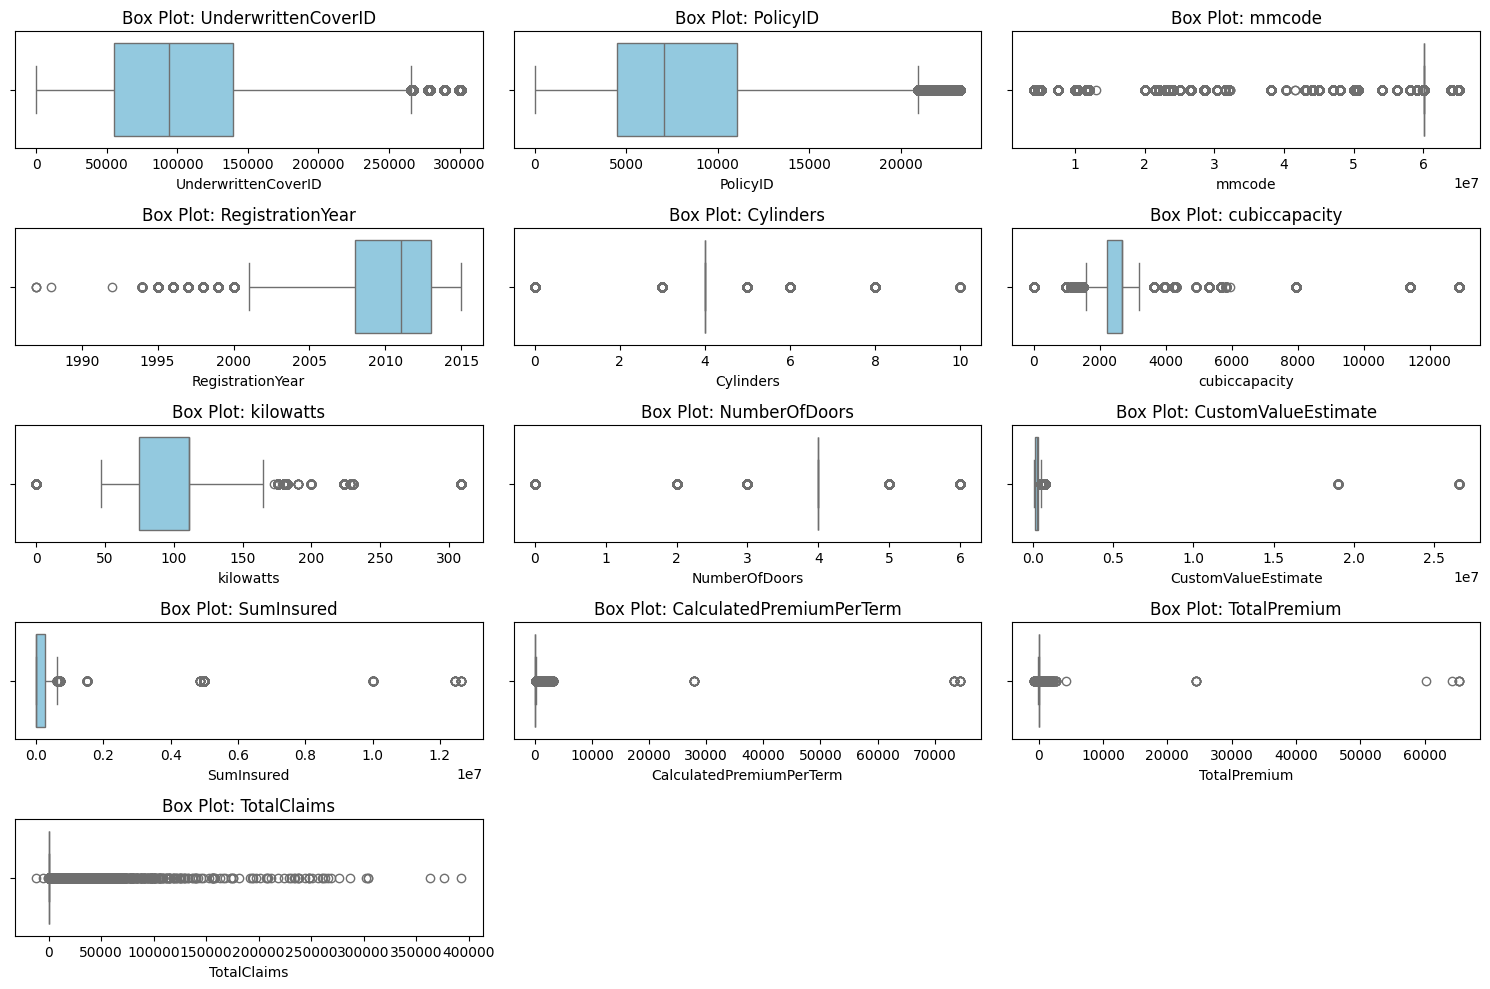

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Check for empty columns and drop them
numerical_columns = [col for col in numerical_columns if df[col].notnull().any()]

# Plot box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)  # Adjust grid size based on column count
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot: {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

def add_row_and_save_new_dataset(input_file_path, new_file_path, new_row):
    """
    Adds a new row to the dataset and saves it to a separate file.

    Parameters:
        input_file_path (str): Path to the original dataset (CSV file).
        new_file_path (str): Path to save the updated dataset (CSV file).
        new_row (dict): A dictionary representing the new row to be added.
                        Keys should match column names of the dataset.
    """
    try:
        # Read the original dataset
        df = pd.read_csv(input_file_path)
        
        # Add the new row
        df = df.append(new_row, ignore_index=True)
        
        # Save the updated dataset to a new file
        df.to_csv(new_file_path, index=False)
        print(f"New dataset with added row saved to: {new_file_path}")
    
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
input_file_path = '../data/MachineLearningRating_v3.txt'  # Replace with your original dataset path
new_file_path = '../data/updated_MachineLearningRating_v3.txt'  # Replace with your desired output file path
new_row = {
    "Column1": "Value1",  # Replace with appropriate column names and values
    "Column2": "Value2",
    "Column3": 123,       # Example numerical value
}

add_row_and_save_new_dataset(input_file_path, new_file_path, new_row)


An error occurred: Error tokenizing data. C error: Expected 1 fields in line 1036, saw 4

